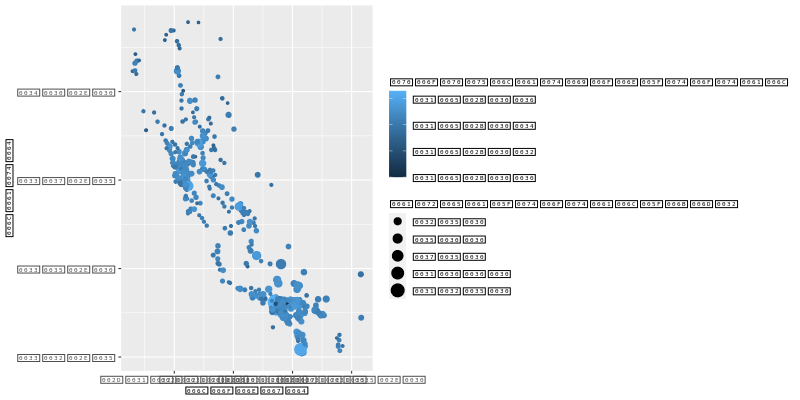

In [1]:
from rpy2.robjects.packages import importr
utils = importr('utils')
dataf = utils.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
                       'master/notebooks/data/california_cities.csv')

from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

import rpy2.ipython.html
rpy2.ipython.html.init_printing()
dataf
dataf.colnames
stats = importr('stats')
base = importr('base')
fit = stats.lm('elevation_m ~ latd + longd', data=dataf)
fit
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.robjects import rl
p = (gp.ggplot(dataf) +
     gp.aes(x=rl('longd'),
            y=rl('latd'),
            color=rl('population_total'),
            size=rl('area_total_km2')) +
     gp.geom_point() +
     gp.scale_color_continuous(trans='log10'))

from rpy2.ipython.ggplot import image_png
image_png(p)
